In [8]:
import yfinance as yf
import numpy as np

# Step 1: Download Nifty50 historical data
nifty50 = yf.download("^NSEI", start="2023-12-01", end="2024-12-01")
nifty50['Returns'] = nifty50['Adj Close'].pct_change()

# Step 2: Drop NaN values
returns = nifty50['Returns'].dropna()

# Step 3: Sort returns
sorted_returns = np.sort(returns)

# Step 4: Calculate VaR at 95% confidence level
confidence_level = 0.95
percentile_index = int((1 - confidence_level) * len(sorted_returns))
historical_var = sorted_returns[percentile_index]

print(f"Historical VaR (95% confidence): {historical_var:.2%}")


[*********************100%***********************]  1 of 1 completed

Historical VaR (95% confidence): -1.25%


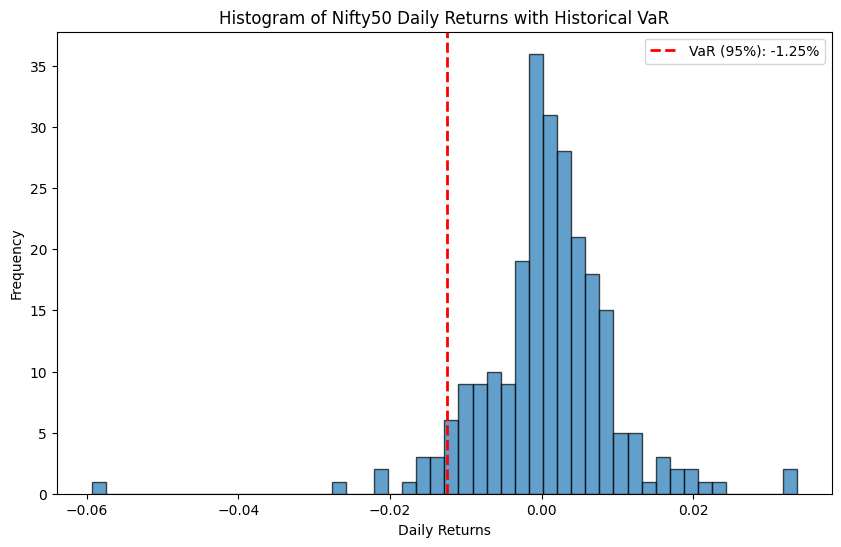

In [10]:
import matplotlib.pyplot as plt

# Step 1: Plot the histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, edgecolor='black', alpha=0.7)

# Step 2: Mark the VaR on the histogram
plt.axvline(historical_var, color='red', linestyle='dashed', linewidth=2, label=f'VaR (95%): {historical_var:.2%}')

# Step 3: Add labels and title
plt.title('Histogram of Nifty50 Daily Returns with Historical VaR')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()
